#Importing dataset and general information about it.

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px

sns.set_style('darkgrid')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train = pd.read_csv("/content/drive/MyDrive/train_4.csv")

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Customer_ID        5282 non-null   object 
 1   Gender             5282 non-null   object 
 2   Senior_Citizen     5282 non-null   int64  
 3   Partner            5282 non-null   object 
 4   Dependents         5282 non-null   object 
 5   Tenure             5282 non-null   int64  
 6   Phone_Service      5282 non-null   object 
 7   Multiple_Lines     5282 non-null   object 
 8   Internet_Service   5282 non-null   object 
 9   Online_Security    5282 non-null   object 
 10  Online_Backup      5282 non-null   object 
 11  Device_Protection  5282 non-null   object 
 12  Tech_Support       5282 non-null   object 
 13  Streaming_TV       5282 non-null   object 
 14  Streaming_Movies   5282 non-null   object 
 15  Contract           5282 non-null   object 
 16  Paperless_Billing  5282 

Since most of the columns are of object data type, we need to pre-process the data and encode them into numeric values for further testing

<Axes: title={'center': 'Churn'}>

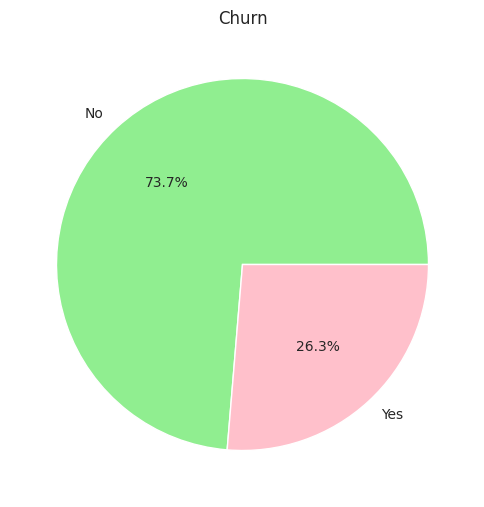

In [ ]:
train['Churn'].value_counts().plot(kind="pie",colors=["lightgreen","pink"],figsize=(6,8),ylabel="",autopct='%1.1f%%',title="Churn")

About 26.3% of total customers in the dataset experienced churn.


---



---



# Data Pre-processing

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Customer_ID        5282 non-null   object 
 1   Gender             5282 non-null   object 
 2   Senior_Citizen     5282 non-null   int64  
 3   Partner            5282 non-null   object 
 4   Dependents         5282 non-null   object 
 5   Tenure             5282 non-null   int64  
 6   Phone_Service      5282 non-null   object 
 7   Multiple_Lines     5282 non-null   object 
 8   Internet_Service   5282 non-null   object 
 9   Online_Security    5282 non-null   object 
 10  Online_Backup      5282 non-null   object 
 11  Device_Protection  5282 non-null   object 
 12  Tech_Support       5282 non-null   object 
 13  Streaming_TV       5282 non-null   object 
 14  Streaming_Movies   5282 non-null   object 
 15  Contract           5282 non-null   object 
 16  Paperless_Billing  5282 

Column 'Customer_ID' is of no use so we can remove it

In [ ]:
train.drop(columns='Customer_ID',inplace=True,errors='ignore')

Now using Label encoder we change 'Dtype' from 'object' to numeric ( int )

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoding_cols=['Gender','Senior_Citizen','Partner','Dependents','Phone_Service','Multiple_Lines','Internet_Service','Online_Security','Online_Backup','Device_Protection',
               'Tech_Support','Streaming_TV','Streaming_Movies','Contract','Paperless_Billing','Payment_Method','Churn']
label_encoders={}
for column in encoding_cols:
    label_encoders[column]=LabelEncoder()
    train[column]=label_encoders[column].fit_transform(train[column])

We had successfully encoded object columns to numeric

In [ ]:
train['Total_Charges'] = pd.to_numeric(train['Total_Charges'], errors='coerce').astype(float)

'Total_Charges' contain numeric values ( Float ) but it is assigned 'Object' data--type,

So we had changed it's D--type to Float using 'to_numeric' function of pandas.

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             5282 non-null   int64  
 1   Senior_Citizen     5282 non-null   int64  
 2   Partner            5282 non-null   int64  
 3   Dependents         5282 non-null   int64  
 4   Tenure             5282 non-null   int64  
 5   Phone_Service      5282 non-null   int64  
 6   Multiple_Lines     5282 non-null   int64  
 7   Internet_Service   5282 non-null   int64  
 8   Online_Security    5282 non-null   int64  
 9   Online_Backup      5282 non-null   int64  
 10  Device_Protection  5282 non-null   int64  
 11  Tech_Support       5282 non-null   int64  
 12  Streaming_TV       5282 non-null   int64  
 13  Streaming_Movies   5282 non-null   int64  
 14  Contract           5282 non-null   int64  
 15  Paperless_Billing  5282 non-null   int64  
 16  Payment_Method     5282 

Total_Charges contains 8 null values

So these entries need to be removed

In [ ]:
train=train.dropna(axis=0)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5274 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             5274 non-null   int64  
 1   Senior_Citizen     5274 non-null   int64  
 2   Partner            5274 non-null   int64  
 3   Dependents         5274 non-null   int64  
 4   Tenure             5274 non-null   int64  
 5   Phone_Service      5274 non-null   int64  
 6   Multiple_Lines     5274 non-null   int64  
 7   Internet_Service   5274 non-null   int64  
 8   Online_Security    5274 non-null   int64  
 9   Online_Backup      5274 non-null   int64  
 10  Device_Protection  5274 non-null   int64  
 11  Tech_Support       5274 non-null   int64  
 12  Streaming_TV       5274 non-null   int64  
 13  Streaming_Movies   5274 non-null   int64  
 14  Contract           5274 non-null   int64  
 15  Paperless_Billing  5274 non-null   int64  
 16  Payment_Method     5274 

Now the data set contains no null values

---



---



#Composition of Different Attributes

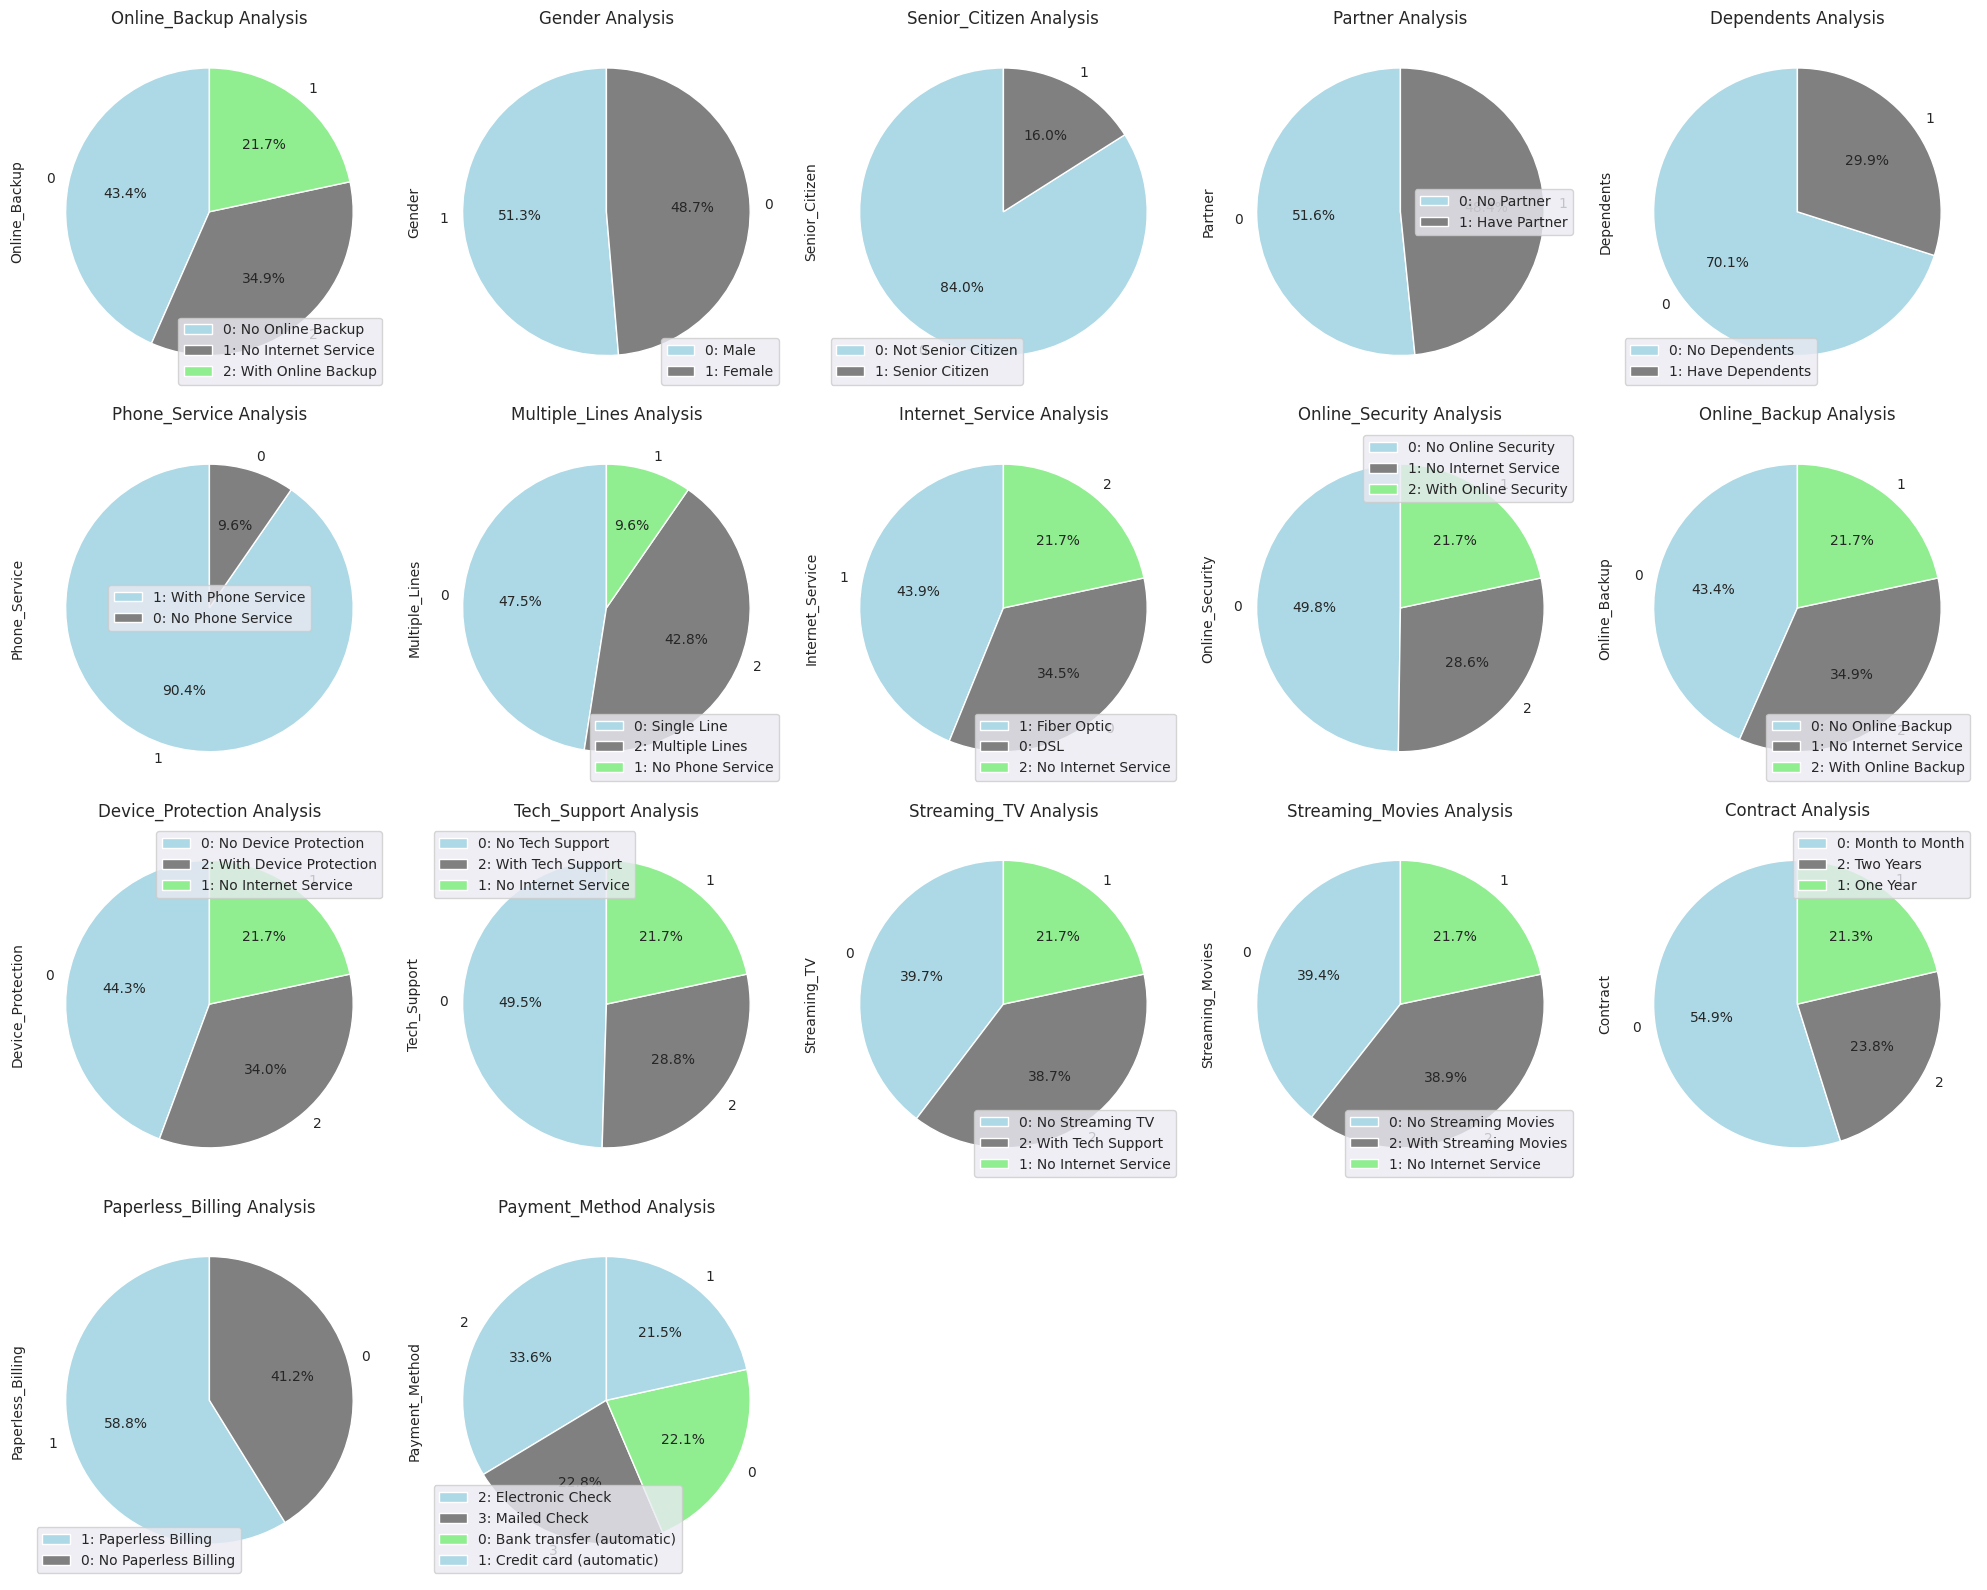

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

fig, axs = plt.subplots(4, 5, figsize=(20, 16))

axs = axs.flatten()

variables_to_plot = [
    'Online_Backup', 'Gender', 'Senior_Citizen', 'Partner', 'Dependents',
    'Phone_Service', 'Multiple_Lines', 'Internet_Service', 'Online_Security',
    'Online_Backup', 'Device_Protection', 'Tech_Support', 'Streaming_TV',
    'Streaming_Movies', 'Contract', 'Paperless_Billing', 'Payment_Method'
]

custom_legends = [
    ['0: No Online Backup', '1: No Internet Service', '2: With Online Backup'],
    ['0: Male', '1: Female'],
    ['0: Not Senior Citizen', '1: Senior Citizen'],
    ['0: No Partner', '1: Have Partner'],
    ['0: No Dependents', '1: Have Dependents'],
    ['1: With Phone Service', '0: No Phone Service'],
    ['0: Single Line', '2: Multiple Lines', '1: No Phone Service'],
    ['1: Fiber Optic', '0: DSL', '2: No Internet Service'],
    ['0: No Online Security', '1: No Internet Service', '2: With Online Security'],
    ['0: No Online Backup', '1: No Internet Service', '2: With Online Backup'],
    ['0: No Device Protection', '2: With Device Protection', '1: No Internet Service'],
    ['0: No Tech Support', '2: With Tech Support', '1: No Internet Service'],
    ['0: No Streaming TV', '2: With Tech Support', '1: No Internet Service'],
    ['0: No Streaming Movies', '2: With Streaming Movies', '1: No Internet Service'],
    ['0: Month to Month', '2: Two Years', '1: One Year'],
    ['1: Paperless Billing', '0: No Paperless Billing'],
    ['2: Electronic Check', '3: Mailed Check', '0: Bank transfer (automatic)', '1: Credit card (automatic)']
]

for i, (variable, legend) in enumerate(zip(variables_to_plot, custom_legends)):
    train[variable].value_counts().plot(
        kind="pie",
        colors=["lightblue", "grey", "lightgreen"],
        autopct='%1.1f%%',
        startangle=90,
        ax=axs[i]
    )

    axs[i].set_title(f'{variable} Analysis')
    axs[i].legend(legend, loc='best')

for i in range(len(variables_to_plot), len(axs)):
    fig.delaxes(axs[i])

plt.tight_layout()

plt.show()


---

#Analysis of various attributes vs Churn in dataset

---



#Contract vs Churn

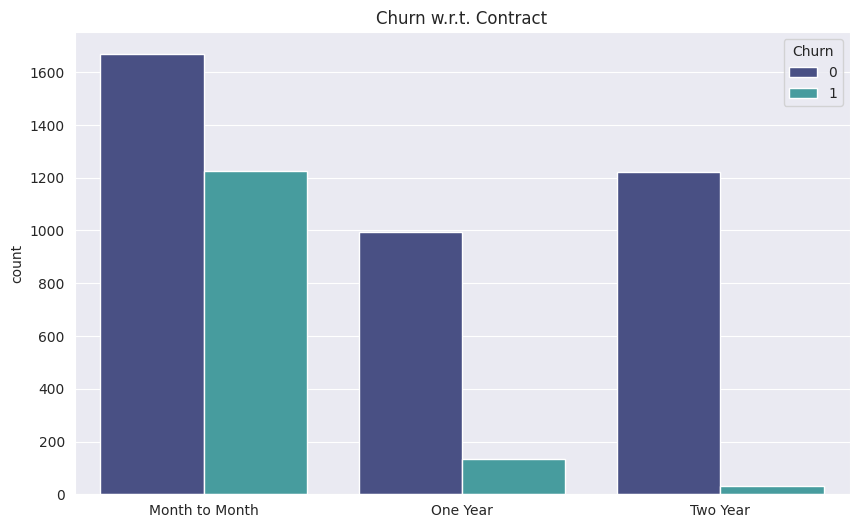

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='Contract',hue='Churn',data=train, palette = 'mako')
plt.xticks(ticks=[0, 1, 2], labels=['Month to Month','One Year', 'Two Year'])
plt.xlabel('')
plt.title('Churn w.r.t. Contract')
plt.show()

Text(0.5, 1.0, 'Churn w.r.t. Contract')

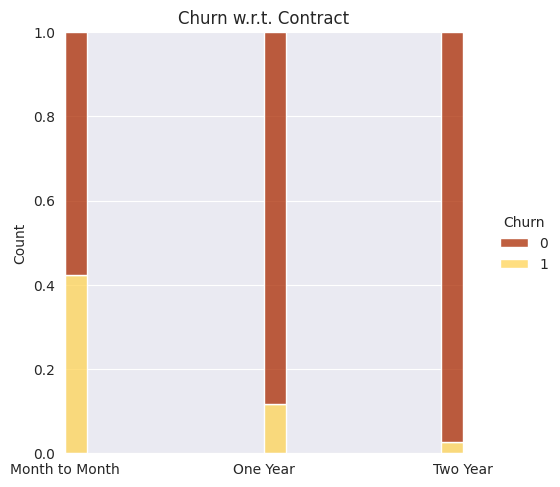

In [ ]:
sns.displot(data=train, x="Contract", hue="Churn", multiple = 'fill', palette = 'afmhot', kde = False)
plt.xticks(ticks=[0, 1, 2], labels=['Month to Month','One Year', 'Two Year'])
plt.xlabel('')
plt.title('Churn w.r.t. Contract')



---
---


A higher churn rate in month-to-month contracts compared to one and two-year contracts can suggest a few things about customer behavior and satisfaction. Here are some possible conclusions: -----

* ***Commitment Level***: Customers who opt for longer-term contracts (one or two
years) are likely more committed to the service or product. They have made a longer commitment, which might indicate higher satisfaction or a stronger need for the service.

* ***Service Quality***: A higher churn rate in month-to-month contracts might indicate that customers are more sensitive to the quality of service or product. They have the flexibility to easily switch providers if they are not satisfied.

* ***Price Sensitivity***: Month-to-month customers may be more price-sensitive. They might be willing to switch to a competitor offering a better deal since they are not tied into a long-term contract.

---
---



#Tenure vs Churn

In [ ]:
px.histogram(train, x = 'Tenure', color = 'Churn',color_discrete_sequence=['lightcoral','lightgreen'])

Text(0.5, 1.0, 'Churn w.r.t. Tenure')

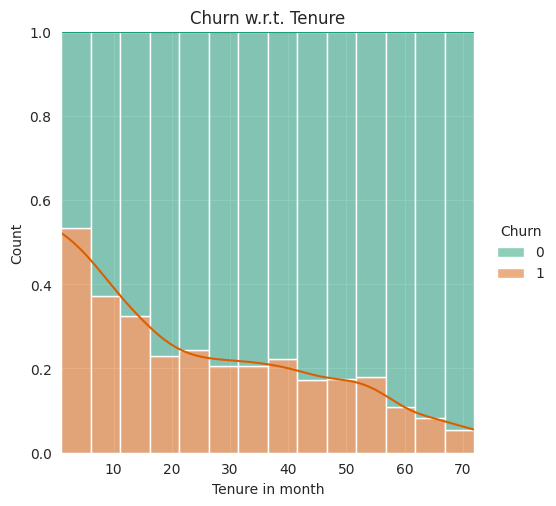

In [ ]:
sns.displot(data=train, x="Tenure", hue="Churn", multiple = 'fill', palette = 'Dark2', kde = True)
plt.xlabel('Tenure in month')
plt.title('Churn w.r.t. Tenure')

---
---

If the churn rates of new users (those with a user tenure below 12 months) are higher compared to old users, several conclusions can be drawn:----

* ***Onboarding and First Impressions***:  The onboarding process or initial user experience may need improvement. High churn among new users could indicate that they are not quickly finding value or satisfaction with the product or service.

* ***Retention Strategies***:   Existing users, who have been with the service for a longer time, may have benefited from effective retention strategies. This could include loyalty programs, targeted communication, or personalized offers that encourage them to stay.

* ***User Engagement***:   Long-term users may be more engaged with the product or service. Improving the engagement strategies for new users, such as providing tutorials, personalized guidance, or proactive customer support, could help in reducing churn.


---
---


#Online Security vs Churn

<function matplotlib.pyplot.show(close=None, block=None)>

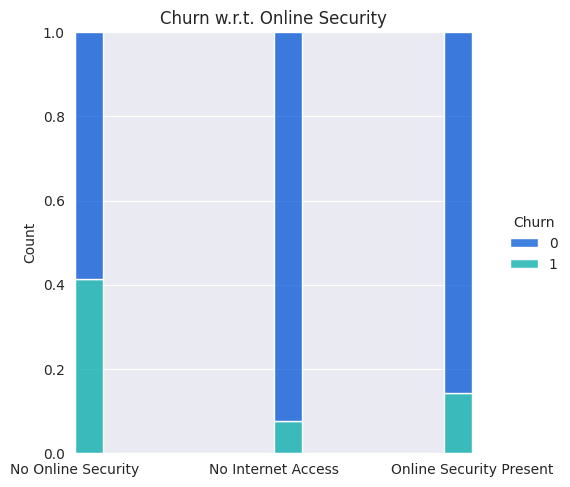

In [ ]:
sns.displot(data=train, x="Online_Security", hue="Churn", multiple = 'fill', palette = 'winter')
plt.xticks(ticks=[0, 1, 2], labels=['No Online Security','No Internet Access', 'Online Security Present'])
plt.xlabel('')
plt.title('Churn w.r.t. Online Security')
plt.show

---
---

If customers without online security have high churn rates, followed by those with minimal online security, and the least churn is among those without internet service, several conclusions can be drawn:----

* ***Security Concerns***: Customers without online security may experience issues such as data breaches, identity theft, or unauthorized access, leading to dissatisfaction and a higher likelihood of switching providers.

* ***Importance of Online Security***: The lower churn rates among those with minimal online security suggest that customers who prioritize and invest in at least basic security measures are more likely to stay with their current service provider.

* ***Internet Service Dependency***: Customers without internet service may have fewer alternatives or may be less dependent on online services. Their lower churn rates could be due to a lack of comparable options or a reduced reliance on online services in general.


---
---

#Tech Support vs Churn

<function matplotlib.pyplot.show(close=None, block=None)>

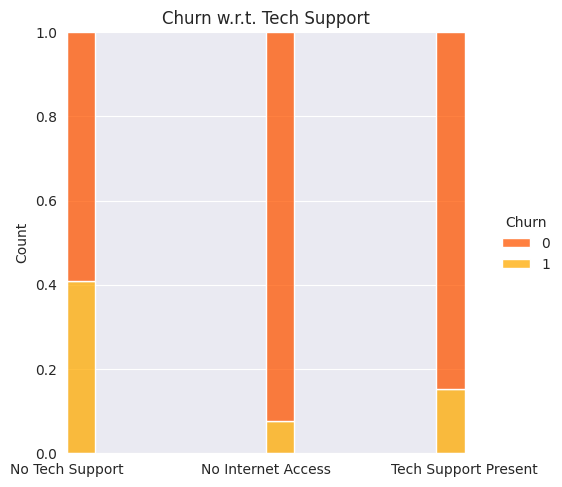

In [ ]:
sns.displot(data=train, x="Tech_Support", hue="Churn", multiple = 'fill', palette = 'autumn')
plt.xticks(ticks=[0, 1, 2], labels=['No Tech Support','No Internet Access', 'Tech Support Present'])
plt.xlabel('')
plt.title('Churn w.r.t. Tech Support')
plt.show

---
---

If customers without tech support have high churn rates, followed by those with minimal tech support, and the least churn is among those without internet service, several conclusions can be drawn:----

* ***Tech Support Importance***: The high churn rates among customers without tech support suggest that the lack of technical assistance contributes to customer dissatisfaction and prompts them to switch providers.

* ***Internet Service Dependency***: Customers without internet service may have lower churn rates because they are less reliant on technical support for online services. Their decision to stay might be influenced more by factors other than technical assistance.

---
---

#Online Backup vs Churn

<function matplotlib.pyplot.show(close=None, block=None)>

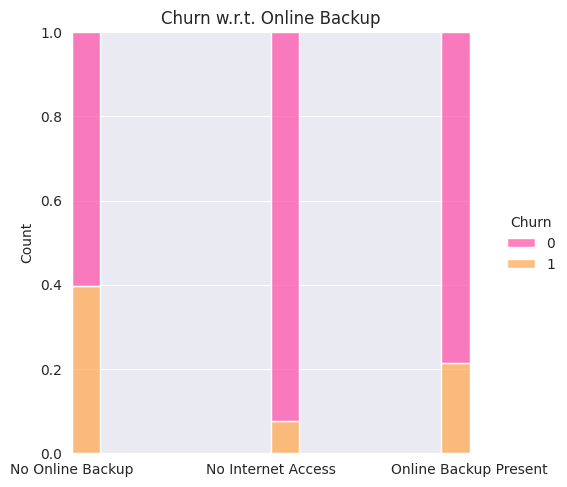

In [ ]:
sns.displot(data=train, x="Online_Backup", hue="Churn", multiple = 'fill', palette = 'spring')
plt.xticks(ticks=[0, 1, 2], labels=['No Online Backup','No Internet Access', 'Online Backup Present'])
plt.xlabel('')
plt.title('Churn w.r.t. Online Backup')
plt.show

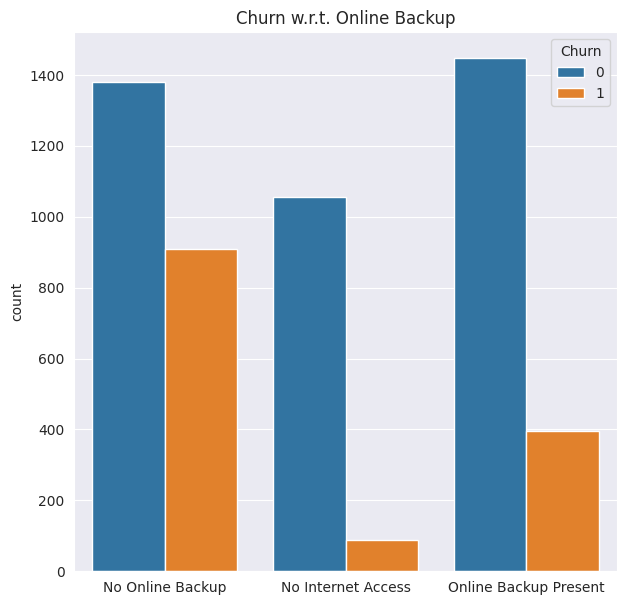

In [ ]:
plt.figure(figsize=(7,7))
sns.countplot(x='Online_Backup',hue='Churn',data=train)
plt.xticks(ticks=[0, 1, 2], labels=['No Online Backup','No Internet Access', 'Online Backup Present'])
plt.xlabel('')
plt.title('Churn w.r.t. Online Backup')
plt.show()

---
---

The observed pattern, where customers without Online Backup experience high churn rates, and those with Online Backup have lower churn, while the least churn is among those without internet service, suggests several potential conclusions:----

* ***Importance of Data Security***: Customers without Online Backup may be more likely to switch providers due to concerns about data loss or lack of a secure backup solution. Those with Online Backup may feel more secure about their data, contributing to lower churn rates.

* ***Dependency on Internet Services***: The lower churn rates among those without internet service might be influenced by factors other than data-related services. These customers may prioritize other aspects of service, such as cost or simplicity, over data-related features.

* ***Competitive Advantage***: Telecommunication providers offering robust data security features, including Online Backup, may have a competitive advantage in retaining customers who prioritize the safety and accessibility of their data.

---
---

#Total Charges and Monthly Charges vs Churn

<function matplotlib.pyplot.show(close=None, block=None)>

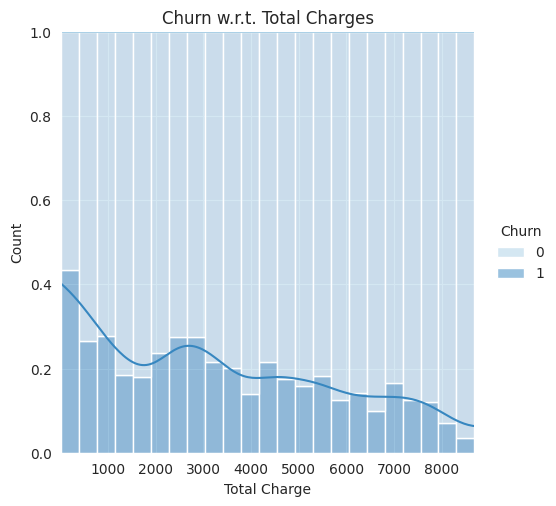

In [ ]:
sns.displot(data=train, x="Total_Charges", hue="Churn", multiple = 'fill', palette = 'Blues', kde = True)
plt.xlabel('Total Charge')
plt.title('Churn w.r.t. Total Charges')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

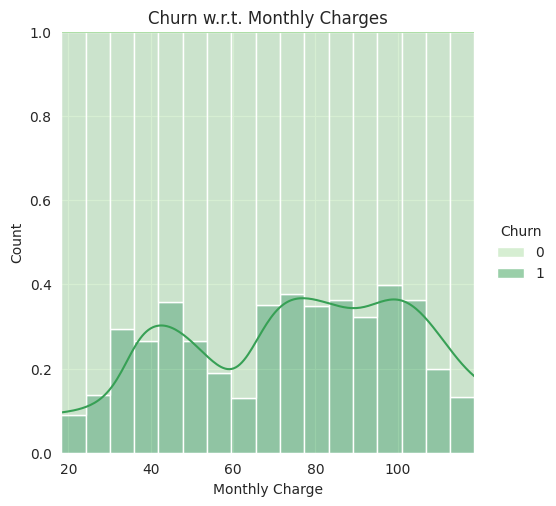

In [ ]:
sns.displot(data=train, x="Monthly_Charges", hue="Churn", multiple = 'fill', palette = 'Greens', kde = True)
plt.xlabel('Monthly Charge')
plt.title('Churn w.r.t. Monthly Charges')
plt.show

---
---

The observed pattern, where the total charge of a user increasing is associated with a decrease in churn rate, but an increase in monthly charge is associated with an increase in churn rate, suggests a potentially complex relationship between pricing structures and customer retention. Here are some possible conclusions:----

* ***Total Value Perception***: Customers may be more likely to stay with a service as the total value they receive increases. This could be due to bundled services, loyalty programs, or discounts applied to customers with higher overall spending.

* ***Long-Term Commitment***: Users with higher total charges may be more committed to the service, possibly because they have opted for longer-term contracts or bundled packages. Longer commitments often correlate with lower churn rates.

* ***Price Sensitivity***: While higher total charges might lead to lower churn rates, an increase in monthly charges alone may make customers more price-sensitive. They may be more likely to churn if they perceive the service as becoming less affordable or if they find better deals elsewhere.

* ***Bundled Services***: If the total charge includes bundled services at a competitive rate, customers may be less likely to churn. However, if the monthly charge increases without a clear added value, customers might be more prone to leaving.

* ***Perceived Value for Monthly Charge***: Customers could be more sensitive to the perceived value of the services they receive in relation to the monthly charge. An increase in monthly charges without a corresponding increase in perceived value may lead to higher churn.

* ***Competitive Pricing***: The competitive landscape, with the availability of lower-cost alternatives or better deals from competitors, may influence the churn rates associated with changes in monthly charges.

---
---

#Correlation of churn with other attributes in the dataset

Text(0.5, 1.0, 'Correlation of Churn with Other Variables')

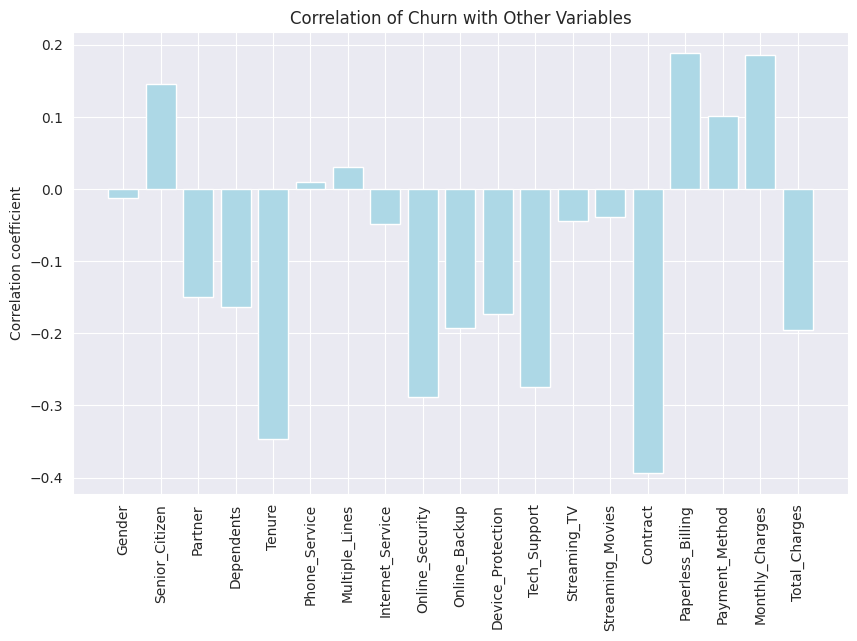

In [ ]:
correlations = train.corr()['Churn'].drop('Churn')
plt.figure(figsize=(10, 6))
plt.bar(correlations.index, correlations.values, color = 'lightblue')
plt.xticks(rotation=90)
plt.ylabel('Correlation coefficient')
plt.title(f'Correlation of Churn with Other Variables')

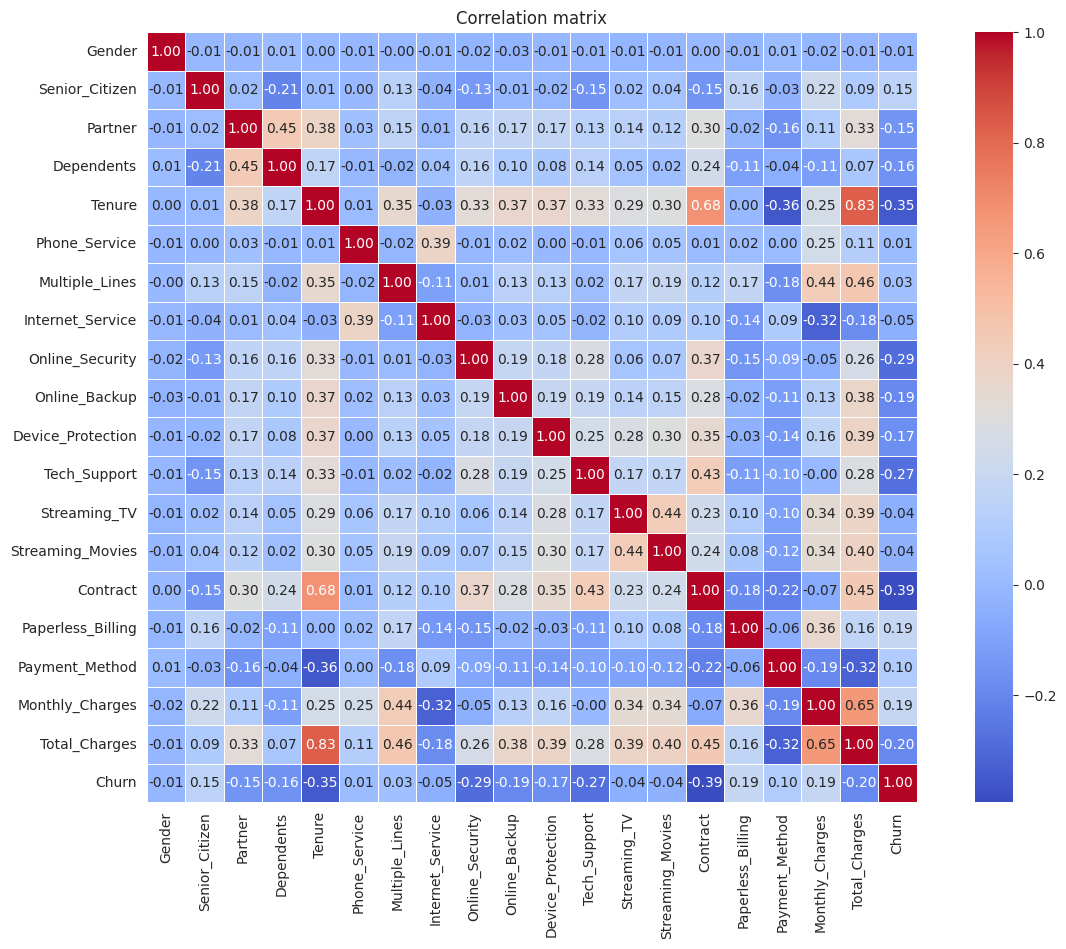

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(train.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, square=True)
plt.title('Correlation matrix')
plt.show()

Various Attributes also show significant correlation with each other :-
* Tenure and Total Charges
* Tenure and Contract
* Total Charges and Monthly Charges
* Multiple Lines and Total Charges
* Multiple Lines and Monthly Charges
* Dependent and Partner
* Contract and Total Charges



---


---


---


---


---
